In [3]:
import tensorflow as tenFlow
import cv2
import os
import matplotlib.pyplot as plot
import numpy as npy

In [4]:
img_array = cv2.imread("train/1/Training_659019.jpg")

In [5]:
img_array.shape

(48, 48, 3)

In [6]:
print(img_array)

[[[154 154 154]
  [176 176 176]
  [145 145 145]
  ...
  [ 77  77  77]
  [ 70  70  70]
  [ 67  67  67]]

 [[181 181 181]
  [156 156 156]
  [122 122 122]
  ...
  [ 74  74  74]
  [ 71  71  71]
  [ 70  70  70]]

 [[164 164 164]
  [133 133 133]
  [ 98  98  98]
  ...
  [ 76  76  76]
  [ 75  75  75]
  [ 74  74  74]]

 ...

 [[  1   1   1]
  [  0   0   0]
  [ 13  13  13]
  ...
  [ 53  53  53]
  [118 118 118]
  [147 147 147]]

 [[ 71  71  71]
  [ 44  44  44]
  [ 24  24  24]
  ...
  [118 118 118]
  [134 134 134]
  [122 122 122]]

 [[106 106 106]
  [ 89  89  89]
  [ 36  36  36]
  ...
  [132 132 132]
  [115 115 115]
  [100 100 100]]]


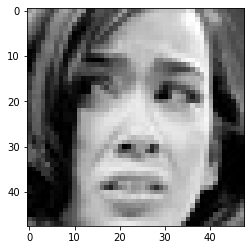

In [7]:
plot.imshow(img_array)

In [8]:
Datadirectory = "train/"

In [9]:
Classes = ["0", "1", "2", "3", "4", "5", "6"]

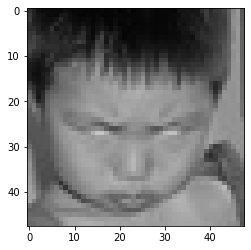

In [10]:
for emotion in Classes:
    path = os.path.join(Datadirectory, emotion)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plot.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plot.show()
        break
    break

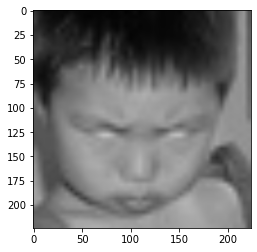

In [11]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plot.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plot.show()

In [12]:
new_array.shape

(224, 224, 3)

In [13]:
trainDataSet = []

def create_trainDataset():
    for emotion in Classes:
        path = os.path.join(Datadirectory, emotion)
        class_name = Classes.index(emotion)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                trainDataSet.append([new_array, class_name])
            except Exception as e:
                pass

In [15]:
create_trainDataset()

In [16]:
print(len(trainDataSet))

28709


In [17]:
import random

random.shuffle(trainDataSet)

In [18]:
X = []
Y = []

for feature, label in trainDataSet:
    X.append(feature)
    Y.append(label)
    
X = npy.array(X).reshape(-1, img_size, img_size, 3)

In [19]:
X.shape

(28709, 224, 224, 3)

In [20]:
X = X/255.0;

In [21]:
Y[505]

4

# Deep Learning Model for Training - Transfer Learning

In [22]:
import tensorflow as tenFlow
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
model = tenFlow.keras.applications.MobileNetV2()

In [24]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

# Transfer Learning - Tuning, Weights will start from last check point

In [25]:
base_input = model.layers[0].input

In [26]:
base_output = model.layers[-2].output

In [27]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)

In [28]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [29]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [30]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [34]:
new_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [257]:
new_model.fit(X, Y, epochs = 15)

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})

In [35]:
new_model.save('Final_model_95p07.h5')

In [36]:
new_model = tenFlow.keras.models.load_model('Final_model_95p07.h5')

In [37]:
image = cv2.imread('sadMan.jpg')

In [38]:
image.shape

(207, 244, 3)

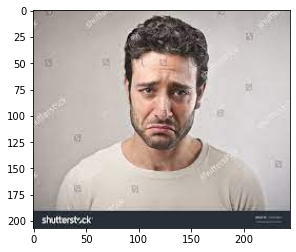

In [39]:
plot.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [40]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [41]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [42]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    faces2 = faceCascade.detectMultiScale(roi_gray)
    if len(faces2) == 0:
        print("Face is not detected")
    else:
        for (ex, ey, ew, eh) in faces2:
            face_roi = roi_color[ey: ey+eh, ex: ex + ew]

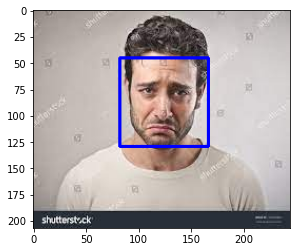

In [43]:
plot.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

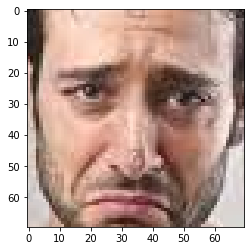

In [44]:
plot.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [45]:
final_image = cv2.resize(face_roi, (224, 224))
final_image = npy.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [46]:
predictions = new_model.predict(final_image)

In [47]:
predictions[0]

array([0.07728961, 0.05010346, 0.07066214, 0.12897122, 0.20731592,
       0.05768911, 0.4079685 ], dtype=float32)

In [48]:
npy.argmax(predictions)

6

In [3]:
import cv2
import numpy as npy

path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255, 255, 255)

img = npy.zeros((500, 500))

text = "some text in a box!"

(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] - 25

box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width +2, text_offset_y - text_height -2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret,frame = cap.read()
    
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        faces2 = faceCascade.detectMultiScale(roi_gray)
        if len(faces2) == 0:
            print("Face is not detected")
        else:
            for (ex, ey, ew, eh) in faces2:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]
    
    final_image = cv2.resize(face_roi, (224, 224))
    final_image = npy.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    Predictions = new_model.predict(final_image)
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if (npy.argmax(Predictions) == 0):
        status = "Angry"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (npy.argmax(Predictions) == 1):
        status = "Disgust"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    
    elif (npy.argmax(Predictions) == 2):
        status = "Fear"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (npy.argmax(Predictions) == 3):
        status = "Happy"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (npy.argmax(Predictions) == 4):
        status = "Sad"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (npy.argmax(Predictions) == 5):
        status = "Surpise"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    else:
        status = "Neutral"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
        
    cv2.imshow('Face Emotion Recognition', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destoryAllWindows()

NameError: name 'new_model' is not defined